# Laptop Price Prediction 

Elon Musk Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\laptop_details.csv")

In [88]:
df=data.copy()

In [89]:
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [91]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [ ]:
#There are null values in rating column

In [92]:
df.duplicated().sum()

297

In [93]:
df= df.drop_duplicates().reset_index(drop=True)

In [94]:
df["Rating"].unique()

array([4.2, 4.3, 4.4, 4.1, nan, 4.6, 4.7, 3.7, 4.9, 3.9, 4. , 4.5, 4.8,
       5. , 3.8, 3.4, 3.5, 3.6, 3. ])

In [95]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

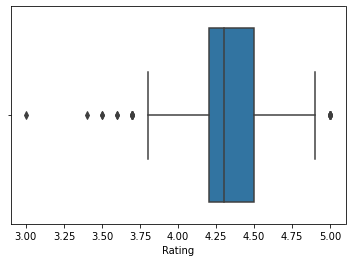

In [96]:
sns.boxplot(df["Rating"])

In [ ]:
#from the above plot it is visible that there are outliers

In [97]:
df["Rating"].var()

0.08994309751968008

In [98]:
df["Rating"].fillna(df["Rating"].median()).var()

0.07208172274321337

In [99]:
def Random_Sample_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [100]:
Random_Sample_imputation("Rating")

In [101]:
df["Rating"].var()

0.08854301816185425

In [102]:
df.isnull().sum()

Product    0
Rating     0
MRP        0
Feature    0
dtype: int64

In [103]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


# PreProcessing

In [104]:
df.loc[1]["Product"]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...'

In [ ]:
#to achieve the problem statement we have to slice the column into multiple columns as per requirement

In [105]:
df.loc[1]["Feature"]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [106]:
#df["Product"]=df["Product"].str.split(" ")

In [107]:
#df["Feature"]=df["Feature"].str.split(" ")

In [108]:
dff=pd.DataFrame()

In [109]:
dff['Brand'] = df["Product"].apply(lambda x : x.split(" ")[0])
dff['Model_Name'] = df["Product"].apply(lambda x : x.split(" ")[:6])
dff['Model_Name'] = dff["Model_Name"].apply(lambda x : "".join(x))
dff['Processor_name'] = df["Feature"].apply(lambda x : x.split("Processor")[0])
dff["ram"] =df["Feature"].apply(lambda x : x.split("Processor")[1].split ("RAM")[0].split(")")[-1])
dff["Processor_generation"] =df["Feature"].apply(lambda x : x.split ("Processor")[1].split("RAM")[0].split(")")[0].split("(")[-1])

In [ ]:
# it is splitted at space and sliced to multiple features and renamed it with respective names

In [111]:
dff["OS"]=df["Feature"].apply(lambda x : x.split("Processor")[1].split("RAM")[-1].split("Operating System")[0])

In [112]:
dff["storage"] = df["Feature"].apply(lambda x : x.split("Processor")[1].split("RAM")[-1].split("Operating System")[-1].split("Display")[0].split("cm")[0])


In [113]:
dff

,Brand,Model_Name,Processor_name,ram,Processor_generation,OS,storage
0,Lenovo,LenovoIdeaPad3Corei311th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,256 GB SSD35.56
1,Lenovo,LenovoIdeaPad3Corei311th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,512 GB SSD39.62
2,ASUS,ASUSVivoBook15(2022)Corei3,Intel Core i3,8 GB DDR4,10th Gen,64 bit Windows 11,512 GB SSD39.62
3,HP,HPPavilionRyzen5HexaCore,AMD Ryzen 5 Hexa Core,8 GB DDR4,8 GB DDR4,64 bit Windows 10,512 GB SSD39.62
4,ASUS,ASUSTUFGamingF15Corei5,Intel Core i5,8 GB DDR4,10th Gen,Windows 11,512 GB SSD39.62
...,...,...,...,...,...,...,...
418,DELL,DELLCorei512thGen-,Intel Core i5,16 GB DDR5,12th Gen,64 bit Windows 11,512 GB SSD33.78
419,HP,HPPavilionRyzen7OctaCore,AMD Ryzen 7 Octa Core,16 GB DDR4,16 GB DDR4,64 bit Windows 10,512 GB SSD39.62
420,ASUS,ASUSChromebookFlipTouchCeleronDual,Intel Celeron Dual Core,4 GB LPDDR4,4 GB LPDDR4,Chrome,29.46
421,ASUS,ASUSZenbookFlip14OLED(2022),Intel Core i7,16 GB LPDDR5,12th Gen,64 bit Windows 11,512 GB SSD35.56


In [114]:
dff["screen_size"] = df["Feature"].apply(lambda x : x.split("Processor")[1].split("RAM")[-1].split("Operating System")[-1].split("Display")[0].split("cm")[-1])


In [115]:
dff["rating"] = df["Rating"]
dff["price"] = df["MRP"]

In [116]:
dff

,Brand,Model_Name,Processor_name,ram,Processor_generation,OS,storage,screen_size,rating,price
0,Lenovo,LenovoIdeaPad3Corei311th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,256 GB SSD35.56,(14 inch),4.2,"₹36,990"
1,Lenovo,LenovoIdeaPad3Corei311th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,512 GB SSD39.62,(15.6 inch),4.2,"₹39,990"
2,ASUS,ASUSVivoBook15(2022)Corei3,Intel Core i3,8 GB DDR4,10th Gen,64 bit Windows 11,512 GB SSD39.62,(15.6 inch),4.3,"₹32,990"
3,HP,HPPavilionRyzen5HexaCore,AMD Ryzen 5 Hexa Core,8 GB DDR4,8 GB DDR4,64 bit Windows 10,512 GB SSD39.62,(15.6 inch),4.4,"₹49,990"
4,ASUS,ASUSTUFGamingF15Corei5,Intel Core i5,8 GB DDR4,10th Gen,Windows 11,512 GB SSD39.62,(15.6 inch),4.4,"₹49,990"
...,...,...,...,...,...,...,...,...,...,...
418,DELL,DELLCorei512thGen-,Intel Core i5,16 GB DDR5,12th Gen,64 bit Windows 11,512 GB SSD33.78,(13.3 Inch),4.8,"₹76,590"
419,HP,HPPavilionRyzen7OctaCore,AMD Ryzen 7 Octa Core,16 GB DDR4,16 GB DDR4,64 bit Windows 10,512 GB SSD39.62,(15.6 inches),4.6,"₹90,000"
420,ASUS,ASUSChromebookFlipTouchCeleronDual,Intel Celeron Dual Core,4 GB LPDDR4,4 GB LPDDR4,Chrome,29.46,(11.6 inch) Touchscreen,4.0,"₹23,490"
421,ASUS,ASUSZenbookFlip14OLED(2022),Intel Core i7,16 GB LPDDR5,12th Gen,64 bit Windows 11,512 GB SSD35.56,(14 inch) Touchscreen,3.0,"₹1,25,990"


In [ ]:
#after all those preprocessing we are left with 423 datapoints with 10 features

In [117]:
dff["Processor_generation"].value_counts()


11th Gen                                                                                                               118
8 GB DDR4                                                                                                               75
12th Gen                                                                                                                66
10th Gen                                                                                                                53
16 GB DDR4                                                                                                              30
16 GB DDR5                                                                                                              15
4 GB DDR4                                                                                                                8
4 GB LPDDR4                                                                                                              7
16 GB Unified Me

In [118]:
def processor_filter(s):
        if "Gen" in s:
            return s
        else:
            return np.NAN       

In [119]:
processor_filter("3rd Gen")


'3rd Gen'

In [120]:
dff["Processor_generation"] = dff["Processor_generation"].apply(processor_filter)


In [121]:
dff["screen_size_inch"] = dff["screen_size"].apply(lambda x : x.split("inch")[0].replace("(","").replace(")","").replace("Inch",""))


In [122]:
dff.shape


(423, 11)

In [123]:
dff = dff.drop(["screen_size"], axis=1)


In [124]:
dff["Processor_generation"].isna().mean()


0.40189125295508277

In [125]:
dff["Processor_generation"] = dff["Processor_generation"].str.replace(": 11th Generation Intel Core i5-1135G7", "11th Gen").replace(": 10th Generation Intel Core i3-1005G1","10th Gen")


In [ ]:
# the final cleaned dataset is now saved to new csv file so that it can be used further any time

In [126]:
dff.to_csv(r"C:\Users\DELL\Desktop\Intership\cleaned_data\cleaned_data.csv", index=False)


In [127]:
pd.read_csv(r"C:\Users\DELL\Desktop\Intership\cleaned_data\cleaned_data.csv")

,Brand,Model_Name,Processor_name,ram,Processor_generation,OS,storage,rating,price,screen_size_inch
0,Lenovo,LenovoIdeaPad3Corei311th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,256 GB SSD35.56,4.2,"₹36,990",14
1,Lenovo,LenovoIdeaPad3Corei311th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,512 GB SSD39.62,4.2,"₹39,990",15.6
2,ASUS,ASUSVivoBook15(2022)Corei3,Intel Core i3,8 GB DDR4,10th Gen,64 bit Windows 11,512 GB SSD39.62,4.3,"₹32,990",15.6
3,HP,HPPavilionRyzen5HexaCore,AMD Ryzen 5 Hexa Core,8 GB DDR4,NaN,64 bit Windows 10,512 GB SSD39.62,4.4,"₹49,990",15.6
4,ASUS,ASUSTUFGamingF15Corei5,Intel Core i5,8 GB DDR4,10th Gen,Windows 11,512 GB SSD39.62,4.4,"₹49,990",15.6
...,...,...,...,...,...,...,...,...,...,...
418,DELL,DELLCorei512thGen-,Intel Core i5,16 GB DDR5,12th Gen,64 bit Windows 11,512 GB SSD33.78,4.8,"₹76,590",13.3
419,HP,HPPavilionRyzen7OctaCore,AMD Ryzen 7 Octa Core,16 GB DDR4,NaN,64 bit Windows 10,512 GB SSD39.62,4.6,"₹90,000",15.6
420,ASUS,ASUSChromebookFlipTouchCeleronDual,Intel Celeron Dual Core,4 GB LPDDR4,NaN,Chrome,29.46,4.0,"₹23,490",11.6
421,ASUS,ASUSZenbookFlip14OLED(2022),Intel Core i7,16 GB LPDDR5,12th Gen,64 bit Windows 11,512 GB SSD35.56,3.0,"₹1,25,990",14


In [128]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 423 non-null    object 
 1   Model_Name            423 non-null    object 
 2   Processor_name        423 non-null    object 
 3   ram                   423 non-null    object 
 4   Processor_generation  253 non-null    object 
 5   OS                    423 non-null    object 
 6   storage               423 non-null    object 
 7   rating                423 non-null    float64
 8   price                 423 non-null    object 
 9   screen_size_inch      423 non-null    object 
dtypes: float64(1), object(9)
memory usage: 33.2+ KB


In [ ]:
#the above info says that there is a need to change astype of few columns